# Federated Learning with Large Power Transformer Maintenance Data

# Step 1: Install Required Packages


In [1]:
%pip install tensorflow tensorflow_federated pandas scikit-learn matplotlib openpyxl

# Step 2: Import Upload Dataset

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Importing custom functions
import common_functions as cf

# Step 3: Data Loading and Preprocessing

In [3]:
# Load data
df = pd.read_excel("Large_Power_Transformer_Maintenance_Data.xlsx", sheet_name='Sheet1')

# Clean and encode
df = df.dropna(thresh=len(df) * 0.5, axis=1).dropna()
df = pd.get_dummies(df, columns=['PRD_Status', 'RPRR_Status'])

# Extract labels and scale features
y = df['Maintenance_required']
X = df.drop(columns=['Maintenance_required', 'Product_variant'])  # Drop 'Product_variant'

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Final combined dataset
df_final = X_scaled.copy()
df_final['Maintenance_required'] = y.values

# Step 4: Create Dirichlet Non-IID Client Partition and run comparisons for FedAvg and FedAvg with Momentum

Round 1: Accuracy=0.8222
Round 2: Accuracy=0.8749
Round 3: Accuracy=0.8776
Round 4: Accuracy=0.8862
Round 5: Accuracy=0.8887
Round 6: Accuracy=0.8900
Round 7: Accuracy=0.8873
Round 8: Accuracy=0.8924
Round 9: Accuracy=0.8880
Round 10: Accuracy=0.8896
Round 11: Accuracy=0.8940
Round 12: Accuracy=0.8891
Round 13: Accuracy=0.8920
Round 14: Accuracy=0.8940
Round 15: Accuracy=0.8947
Round 16: Accuracy=0.8927
Round 17: Accuracy=0.8942
Round 18: Accuracy=0.8931
Round 19: Accuracy=0.8947
Round 20: Accuracy=0.8956
Round 1: Accuracy=0.8978
Round 2: Accuracy=0.8027
Round 3: Accuracy=0.8771
Round 4: Accuracy=0.8760
Round 5: Accuracy=0.8931
Round 6: Accuracy=0.8658
Round 7: Accuracy=0.8893
Round 8: Accuracy=0.8716
Round 9: Accuracy=0.8927
Round 10: Accuracy=0.8842
Round 11: Accuracy=0.8851
Round 12: Accuracy=0.8858
Round 13: Accuracy=0.8864
Round 14: Accuracy=0.8893
Round 15: Accuracy=0.8889
Round 16: Accuracy=0.8896
Round 17: Accuracy=0.8862
Round 18: Accuracy=0.8867
Round 19: Accuracy=0.8938
Roun

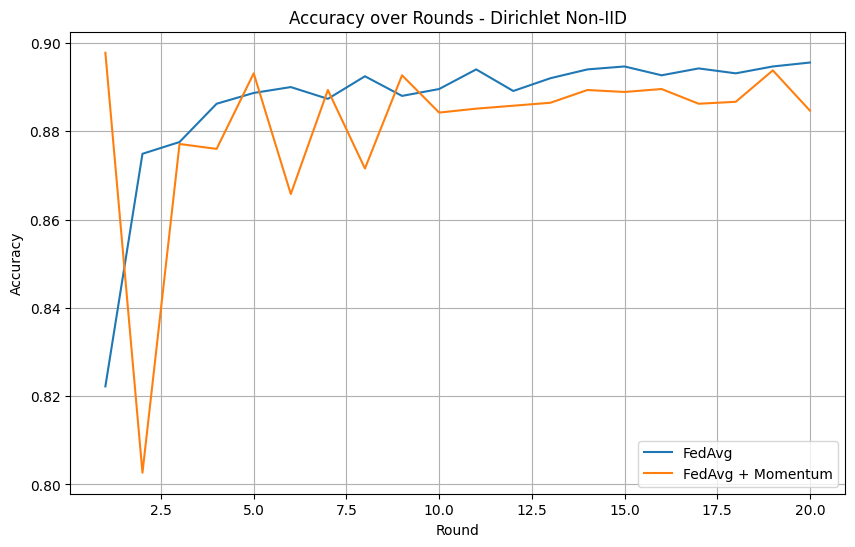

In [4]:
# Create TFF dataset
dirichlet_clients = cf.create_dirichlet_non_iid(df_final, num_clients=5, alpha=0.5, label_col='Maintenance_required')
# Compare on Dirichlet Non-IID data
cf.compare_algorithms(dirichlet_clients, "Dirichlet Non-IID", num_rounds=20)

# Step 5: Create Feature Skew Non-IID Client Partition and run comparisons for FedAvg and FedAvg with Momentum

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Round 1: Accuracy=0.7504
Round 2: Accuracy=0.8178
Round 3: Accuracy=0.8180
Round 4: Accuracy=0.8187
Round 5: Accuracy=0.8207
Round 6: Accuracy=0.8204
Round 7: Accuracy=0.8218
Round 8: Accuracy=0.8256
Round 9: Accuracy=0.8238
Round 10: Accuracy=0.8231
Round 11: Accuracy=0.8233
Round 12: Accuracy=0.8224
Round 13: Accuracy=0.8216
Round 14: Accuracy=0.8224
Round 15: Accuracy=0.8224
Round 16: Accuracy=0.8236
Round 17: Accuracy=0.8224
Round 18: Accuracy=0.8220
Round 19: Accuracy=0.8224
Round 20: Accuracy=0.8204
Round 1: Accuracy=0.7998
Round 2: Accuracy=0.8184
Round 3: Accuracy=0.8218
Round 4: Accuracy=0.8187
Round 5: Accuracy=0.8251
Round 6: Accuracy=0.8262
Round 7: Accuracy=0.8289
Round 8: Accuracy=0.8298
Round 9: Accuracy=0.8284
Round 10: Accuracy=0.8304
Round 11: Accuracy=0.8311
Round 12: Accuracy=0.8318
Round 13: Accuracy=0.8329
Round 14: Accuracy=0.8322
Round 15: Accuracy=0.8331
Round 16: Accuracy=0.8367
Round 17: Accuracy=0.8327
Round 18: Accuracy=0.8360
Round 19: Accuracy=0.8367
Roun

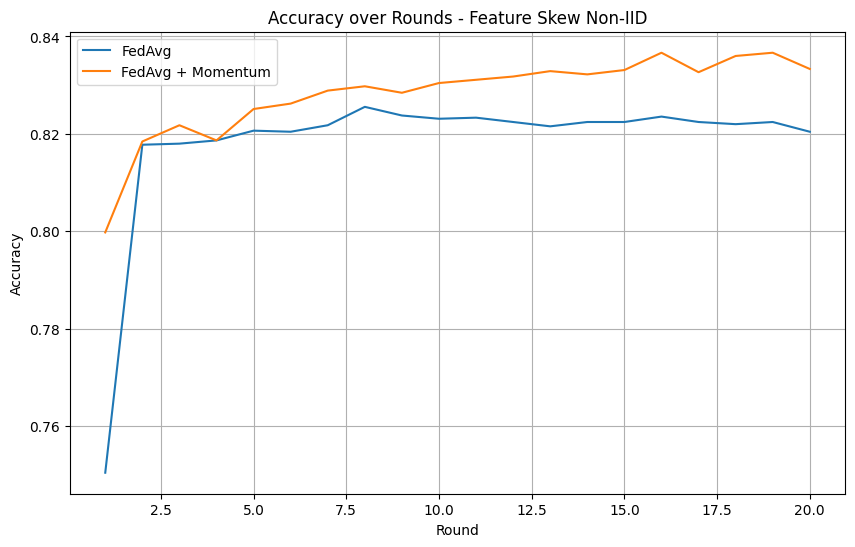

In [5]:
# Create IID dataset
feature_skew_clients = cf.create_feature_skew_non_iid(df_final, num_clients=5, feature='LTC_tank_temperature', label_col='Maintenance_required')
# Compare on Feature Skew Non-IID data
cf.compare_algorithms(feature_skew_clients, "Feature Skew Non-IID", num_rounds=20)

# Step 6: Compare All Four Federated Algorithms

Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.11/dist-packages/tensorflow_federated/python/learning/models/keras_utils.py:201: UserWarning: Batch Normalization contains non-trainable variables that won't be updated during the training. Consider using Group Normalization instead.
  warnings.warn(


Round 1: Accuracy=0.7911
Round 2: Accuracy=0.8204
Round 3: Accuracy=0.8240
Round 4: Accuracy=0.8256
Round 5: Accuracy=0.8251
Round 6: Accuracy=0.8249
Round 7: Accuracy=0.8251
Round 8: Accuracy=0.8240
Round 9: Accuracy=0.8231
Round 10: Accuracy=0.8233
Round 11: Accuracy=0.8244
Round 12: Accuracy=0.8262
Round 13: Accuracy=0.8258
Round 14: Accuracy=0.8242
Round 15: Accuracy=0.8256
Round 16: Accuracy=0.8242
Round 17: Accuracy=0.8251
Round 18: Accuracy=0.8267
Round 19: Accuracy=0.8267
Round 20: Accuracy=0.8264
Round 21: Accuracy=0.8260
Round 22: Accuracy=0.8287
Round 23: Accuracy=0.8276
Round 24: Accuracy=0.8282
Round 25: Accuracy=0.8273
Round 26: Accuracy=0.8278
Round 27: Accuracy=0.8300
Round 28: Accuracy=0.8289
Round 29: Accuracy=0.8278
Round 30: Accuracy=0.8300
Round 31: Accuracy=0.8309
Round 32: Accuracy=0.8291
Round 33: Accuracy=0.8291
Round 34: Accuracy=0.8302
Round 35: Accuracy=0.8302
Round 36: Accuracy=0.8336
Round 37: Accuracy=0.8320
Round 38: Accuracy=0.8322
Round 39: Accuracy=0.

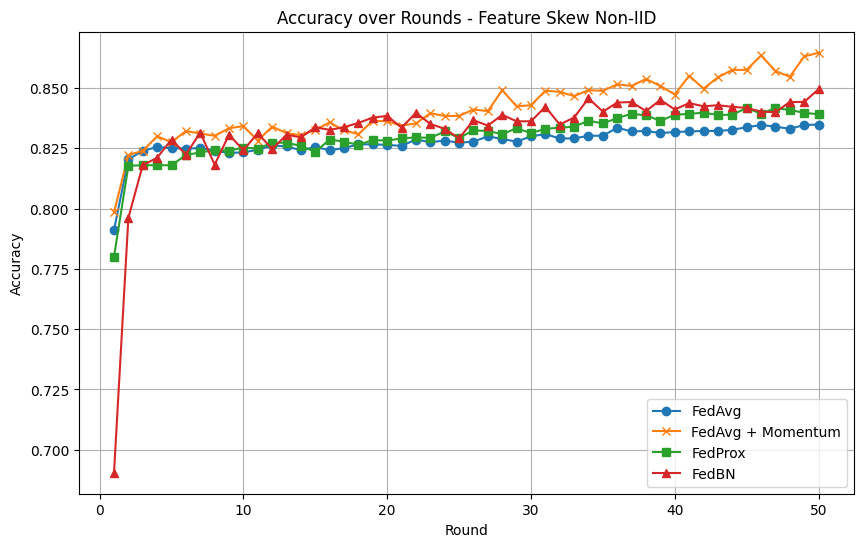

In [6]:
# For Feature Skew Non-IID data, we can also compare all algorithms
# using the compare_all_algorithms function
cf.compare_all_algorithms(feature_skew_clients, "Feature Skew Non-IID", num_rounds=50)